# Continuous Control

This unity environment consists of an arm that moes to target locations, the agent gets a reward of +0-1 for each point the arm is at the goal position.
The goal of the agent is to maintain its position at the target location

In [3]:
env = UnityEnvironment(file_name='../Reacher_Linux/Reacher.x86_64', no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`(thus the reason for using a tanh activation function)..

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Model

The architecture is comprised of two neural networks(Actor and Critic) defined in `model.py` 

Both the Actor and critic network takes in state_size (int): Dimension of each state, action_size (int): Dimension of each action, seed (int): Random seed, fc1_units (int): Number of nodes in first hidden layer, fc2_units (int): Number of nodes in second hidden layer.

Number of nodes in first hidden layer=256, Number of nodes in second hidden layer=128

The agent continues episodical training via the the ddpg agent until `n_episoses` is reached or until the environment is solved. The  environment is considered solved when the average reward (over the last 100 episodes) is at least +30.0. Note if the number of agents is >1 then the average reward of all agents at that step is used.

Each episode continues until `max_t` time-steps is reached or until the environment says it's done.

As above, a reward of +0.1 is provided for each step that the agent's hand is in the goal location.

The DDPG agent is contained in `ddpg_agent.py`

For each time step and agent the Agent acts upon the state utilising a shared (at class level) `replay_buffer`, `actor_local`, `actor_target`, `actor_optimizer`, `critic_local`, `criticl_target` and `critic_optimizer` networks.

### DDPG Hyper Parameters
- n_episodes (int): maximum number of training episodes
- max_t (int): maximum number of timesteps per episode
- num_agents: number of agents in the environment

Where
`n_episodes=2000`, `max_t=1000`

### DDPG Agent Hyper Parameters

- BUFFER_SIZE (int): replay buffer size
- BATCH_SIZ (int): mini batch size
- GAMMA (float): discount factor
- TAU (float): for soft update of target parameters
- LR_ACTOR (float): learning rate for optimizer
- LR_CRITIC (float): learning rate for optimizer
- WEIGHT_DECAY (float): L2 weight decay
- N_TIME_STEPS (int): every n time step do update


Where 
`BUFFER_SIZE = int(1e6)`, 
`BATCH_SIZE = 128`, 
`GAMMA = 0.99`, 
`TAU = 1e-3`, 
`LR_ACTOR = 1e-4`, 
`LR_CRITIC = 1e-4`,
`WEIGHT_DECAY = 0.0`,
`N_TIME_STEPS = 20`

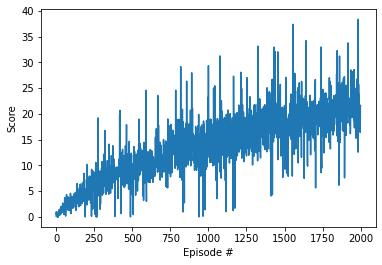

In [7]:
Plot of score achieved against the number of episodes